# Visualización de datos


## Visualización en Pandas y Matplotlib
En esta práctica utilizaremos el archivo "enigh_2020" que incluye las variables principales de la ENIGH 2020 (Encuesta Nacional de Ingreso y Gasto en Hogares) con observaciones de los principales municipios de la zona metropolitana de Monterrey. 

In [1]:
# Importa la biblioteca de pandas
import pandas as pd

In [2]:
# Carga el archivo 'enigh2020.xlsx' en un dataframe "df"
#df = pd.read_excel('../datasets/enigh2020.xlsx')
df = pd.read_excel('https://github.com/adan-rs/AnalisisDatos/raw/main/datasets/enigh2020.xlsx')

In [3]:
# Revisa las variables y evalúa si hay datos perdidos en una columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    2332 non-null   int64  
 1   ubica_geo   2332 non-null   object 
 2   clave_mun   2332 non-null   int64  
 3   tam_loc     2332 non-null   int64  
 4   est_socio   2332 non-null   object 
 5   clase_hog   2332 non-null   object 
 6   sexo_jefe   2332 non-null   object 
 7   edad_jefe   2332 non-null   int64  
 8   educa_jefe  2332 non-null   int64  
 9   tot_integ   2332 non-null   int64  
 10  hombres     2332 non-null   int64  
 11  mujeres     2332 non-null   int64  
 12  p65mas      2332 non-null   int64  
 13  ing_cor     2332 non-null   float64
 14  gasto_mon   2332 non-null   float64
 15  alimentos   2332 non-null   float64
 16  cereales    2332 non-null   float64
 17  carnes      2332 non-null   float64
 18  leche       2332 non-null   float64
 19  huevo       2332 non-null  

Seleccionemos una columna con una variable categórica. Por ejemplo, el sexo del jefe de familia ('sexo_jefe'). Obtén un conteo de la frecuencia en cada categoría. Recuerda que para una variable 'X' esto se puede obtener con el comando  `df['X'].value_counts()`

In [4]:
# Obtén el conteo de la variable 'sexo_jefe'
df['sexo_jefe'].value_counts()

sexo_jefe
hombre    1780
mujer      552
Name: count, dtype: int64

**Diagramas de pastel** Los dataframes en Pandas tienen un método *plot* que permite crear fácilmente un gráfico. Por ejemplo, para una variable categórica "X", podemos crear un diagrama de pastel (pie) con el siguiente comando: `df.X.value_counts().plot(kind = 'pie')`. 

<Axes: ylabel='count'>

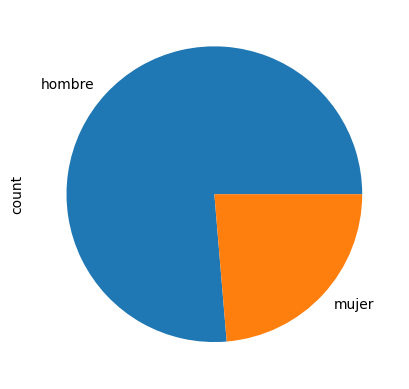

In [5]:
# Crea un gráfico de pastel para la variable 'sexo_jefe'
df['sexo_jefe'].value_counts().plot(kind = 'pie')

Observa que aparece un texto antes del gráfico relacionada con el comando utilizado. Para evitar esto, repite el comando agregando un punto y coma al final.

**Diagramas de barra** Otra opción para variables categóricas son los diagramas de barra. Para ello se puede utilizar el parámetro *kind='bar'* para un gráfico vertical o *kind=barh* para gráficos horizontales. 

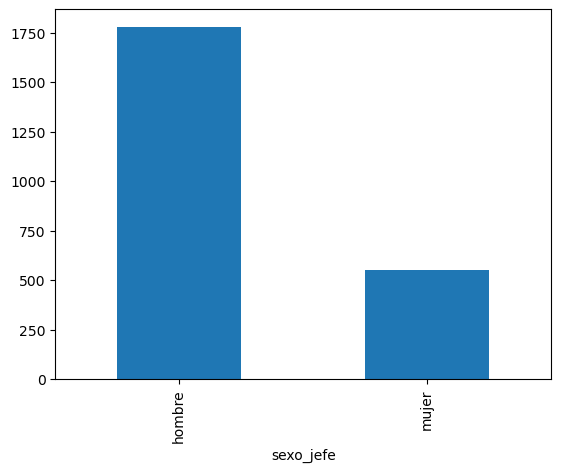

In [6]:
# Crea un gráfico de barras horizontal para la variable 'ubica_geo'
df['sexo_jefe'].value_counts().plot(kind = 'bar');

Existen algunos parámetros para modificar la apariencia del gráfico. Por ejemplo *width* indica la proporción de espacio que ocupan las barras, que dede manera predeterminada es 0.5 (*¿por qué es importante dejar un hueco entre las barras?*). El parámetro *alpha* sirve para agregar un nivel de transparencia desde completamente transparente (0) hasta completamente opaco (1). Con *color* podemos establecer una lista de colores codificados.

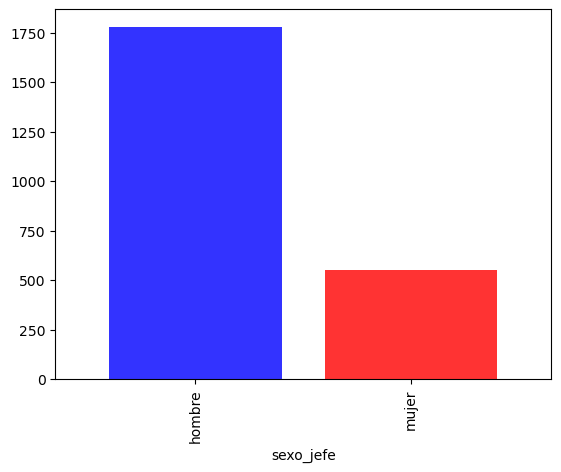

In [7]:
# Realiza de nuevo el gráfico anterior para modificar los parámetros width, alpha y color
df['sexo_jefe'].value_counts().plot(kind = 'bar', width = 0.80, alpha = 0.8, color = ['b', 'r']);

Para ejemplificar gráficos más complejos utilizaremos como referencia una tabla cruzada a partir de una tabla pivote. Crearemos esta tabla con la instrucción `tabla = df.pivot_table(index='ubica_geo', columns='sexo_jefe', values='tot_integ', aggfunc='sum')`. Las filas serán los diferentes municipios, las columnas el sexo del jefe de familia y los valores dentro de la tabla serán la suma de cada combinación de nombre y categoría

In [8]:
# Crear tabla pivote
tabla = df.pivot_table(index='ubica_geo', columns='sexo_jefe', values='tot_integ', aggfunc='sum')
tabla

sexo_jefe,hombre,mujer
ubica_geo,,
Apodaca,748,187
Cadereyta,522,93
Escobedo,944,200
Garcia,391,57
Guadalupe,680,217
Juarez,625,152
Monterrey,868,266
Pesqueria,379,81
San_Nicolas,473,161


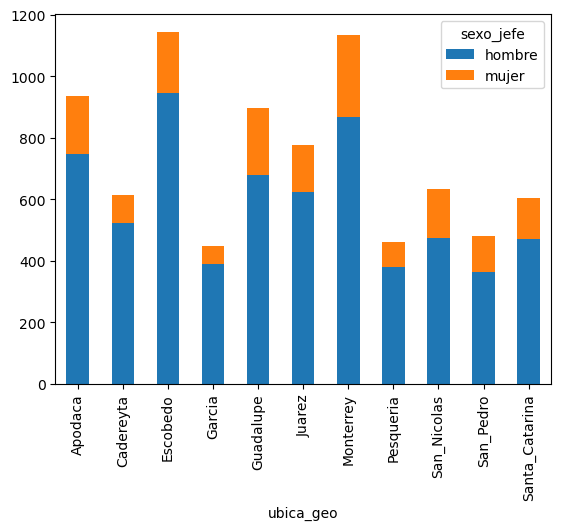

In [9]:
# Construye un gráfico de barras para "tabla". Modifica y agrega el parámetro 'stacked=True'
tabla.plot(kind = 'bar', stacked = True);

Si nos interesa mostrar más de un gráfico se utiliza el parámetro *subplots=True*

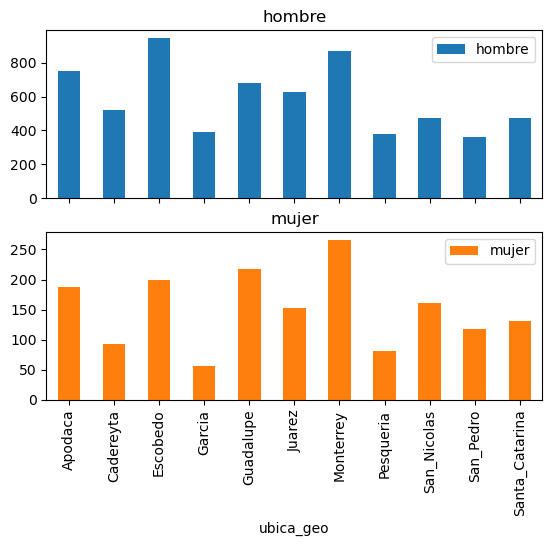

In [10]:
# Construye gráficos de barras para tablas utilizando subplots=True
tabla.plot(kind = 'bar', subplots = True);

Otro gráfico disponible es *'scatter'* para los diagramas de dispersión. Por ejemplo:  
`df.plot(kind='scatter', x='ing_cor', y='gasto_mon')` 

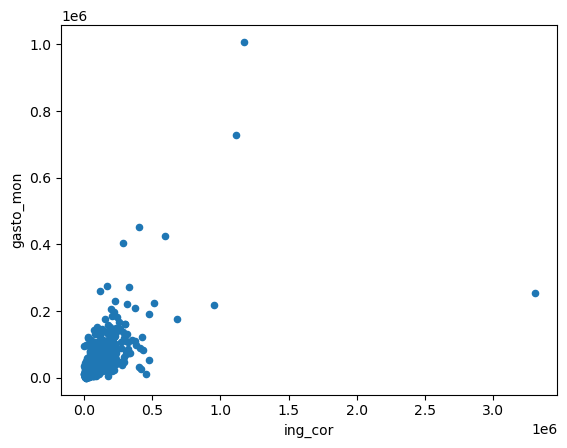

In [11]:
# Crea un diagrama de dispersión para ingreso corriente y gasto monetario
df.plot(kind='scatter', x='ing_cor', y='gasto_mon');

## Gráficos con Matplotlib
Para realizar gráficos más complejos es necesario utilizar otros paquetes como *Seaborn*. La estructura general de una función en Seaborn es `sns.plotClass(x=Xvar, y=Yvar, data=data, kind=kind, options)` en la cual sns es el alias de Seaborn, *plotClass* es una familia de gráficos.  
Tanto Pandas como Seaborn están construidas con el paquete *Matplotlib* interactuando con el módulo *pyplot*. Por lo tanto, se requiere importar el módulo *pyplot* aunque no lo utilices directamente. Para importarlo utiliza el comando `import matplotlib.pyplot as plt`

In [12]:
# Importa pyplot
import matplotlib.pyplot as plt

En la terminología de matplotlib, los gráficos se hace en un contenedor llamado figura (*figure*), y cada gráfico  se crea dentro de un área definida por ejes (*axis*). Puedes crear una figura con `fig = plt.figure()` en la cual de manera predeterminada solo hay un *axis* pero puedes definir este conjunto de ejes al crear la *figure*. Por ejemplo,  `fig, axis = plt.subplots(nrows=1, ncols=1)` para un 1x1 conjunto de ejes o `fig, axis = plt.subplots(2,2)` para crear 4 conjuntos de ejes. 
Cada *axis* se nombra, generalmente, como *ax*. Entonces es común encontrar instrucciones como    
`fig, ax = plt.subplots()`  
`fig, axs = plt.subplots(2,2)`  
`fig, (ax1, ax2) = plt.subplots(1,2)`  


Algunas instrucciones básicas son:  
| Componente | Ejemplo |
|-------------|--------|
| Título de la figura | fig.suptitle('*Título*') |
| Título del axis | ax.set_title('*Título del conjunto de ejes*') |  
| Etiqueta eje x | ax.set_xlabel('*Etiqueta eje X*') |  
| Etiqueta eje y | ax_set_ylabel('*Etiqueta eje Y*') |

## Diagrama de dispersión

Para un diagrama de dispersión se puede utilizar la función `plt.scatter()`en la cual los primeros dos argumentos son las variables x y y. 

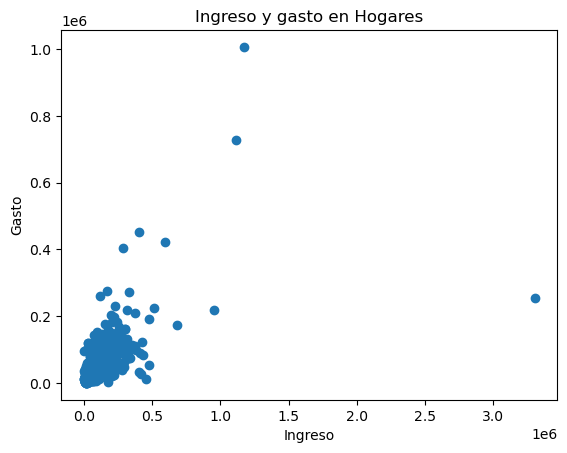

In [13]:
# Ejemplo
fig, ax = plt.subplots()
ax.scatter(df['ing_cor'], df['gasto_mon'])
ax.set_title('Ingreso y gasto en Hogares')
ax.set_xlabel('Ingreso')
ax.set_ylabel('Gasto');

In [14]:
# Se crea un diccionario para asociar un color a cada estrato
colores = {'bajo':'red', 'medio_bajo':'orange', 'medio_alto':'yellow', 'alto':'green'}
# La función map() se puede usar para transformaciones simples elemento por elemento
color_estrato = df['est_socio'].map(colores)

Text(0, 0.5, 'Gasto')

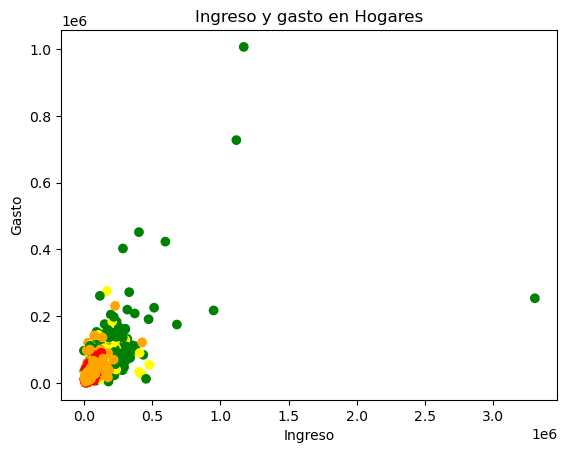

In [15]:
# Ejemplo
fig, ax = plt.subplots()
ax.scatter(df['ing_cor'], df['gasto_mon'], color = color_estrato)
ax.set_title('Ingreso y gasto en Hogares')
ax.set_xlabel('Ingreso')
ax.set_ylabel('Gasto')

#plt.savefig('images/grafico_dispersion');

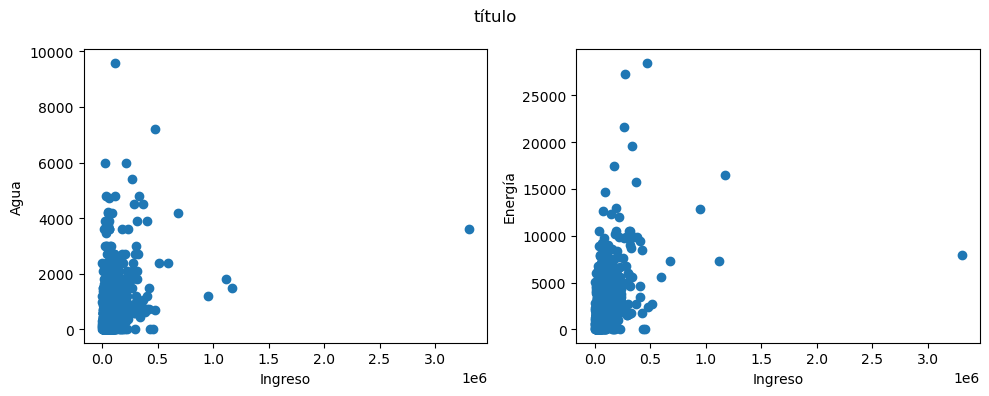

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle('título')

ax1.scatter(df['ing_cor'], df['agua'])
ax1.set_xlabel('Ingreso')
ax1.set_ylabel('Agua')

ax2.scatter(df['ing_cor'], df['energia'])
ax2.set_xlabel('Ingreso')
ax2.set_ylabel('Energía')
# Ajusta el diseño
plt.tight_layout();

## Diagrama de pastel

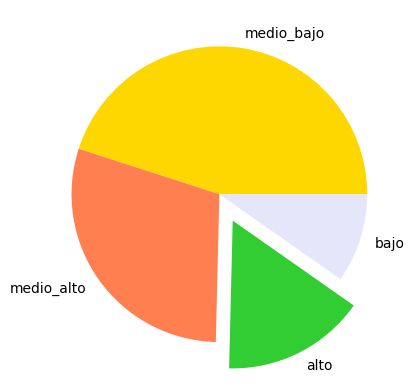

In [17]:
conteo_estratos = df['est_socio'].value_counts()
# pd.DataFrame sirve para convertirlo a dataframe
fig, ax = plt.subplots()
ax.pie(conteo_estratos, labels=conteo_estratos.index,
      colors=['gold', 'coral', 'limegreen', 'lavender'],
      explode = (0,0, 0.2, 0))
plt.show();

Otros colores pueden ser:
- Básicos: blue, red, green, cyan, magenta, yellow, black, white.
- Modificados: skyblue, navy, forestgreen, chocolate, purple, pink, orange, gray
- Otros (X11): aliceblue, blanchedalmond, cornflowerblue, darkgoldenrod, lavender, lightcoral, olive, rosybrown, wheat. 

## Histograma

Un histograma se puede crear con *hist()*. El primer argumento es el conjunto de datos. Los *bins* corresponden a las barras.

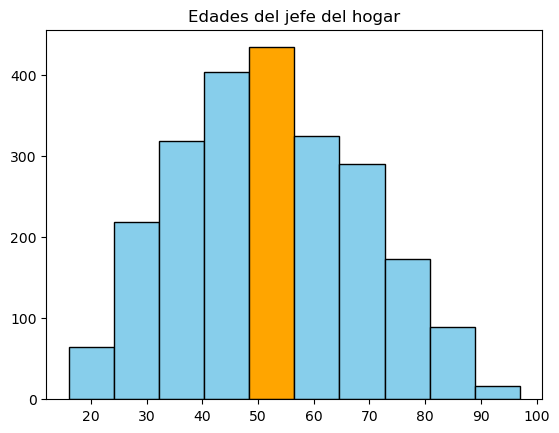

In [18]:
fig, ax = plt.subplots()
h=ax.hist(df['edad_jefe'], bins=10, color='skyblue', edgecolor='black', cumulative=False)
h[2][4].set_facecolor('orange')
ax.set_title('Edades del jefe del hogar')
plt.show();

## Diagrama de caja (boxplot)

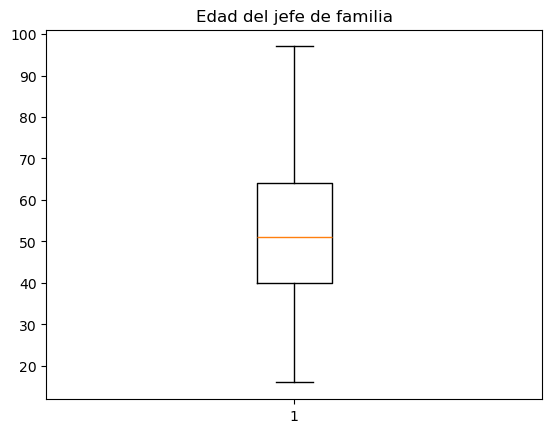

In [19]:
fig, ax = plt.subplots()
ax.boxplot(df['edad_jefe'])
ax.set_title('Edad del jefe de familia');

## Referencias
- Se pueden encontrar varios ejemplos de gráficos y códigos en: https://matplotlib.org/stable/gallery/index.html 